### kinact and KI Calculator
This code is free to use but please cite "Mader & Keillor, ACS Med. Chem. Lett. **2024**, *15*, xxxx" and the GitHub link when using it.

The Python code was developed and is maintained by Bethany Atkinson at Dunad Therapeutics.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import least_squares 

In [2]:
from kinact_KI_calculator import KineticParameterCalculator

In [3]:
#read in data (change Sample data sheet.csv to the path/filename of your own directory/IC50 curve data file)
#want array with 4 columns: Pre-incubation time (min), Incubation time (min), [Inhibitor] (µM), Signal (%) (see sample data sheet v2.csv)
array = np.genfromtxt('Sample data sheet.csv', delimiter=',', skip_header=1)

In [4]:
#create an instance of the class called 'kinact_KI_calculated'. 
kinact_KI_calculated = KineticParameterCalculator(array, 1.43, 0.0002, 11, 2.9, 8, 10)

kinact = 0.6244865029338352
KI = 1.0918176750670994


In [5]:
#once the instance of the class has been created the kinact/KI values are automatically calculated and can be accessed through kinact_KI_calculated._kinact and kinact_KI_calculated._KI respectively: 
print("kinact = " + str(kinact_KI_calculated._kinact))
print("KI = " + str (kinact_KI_calculated._KI))

kinact = 0.6244865029338352
KI = 1.0918176750670994


In [6]:
#the R squared value and RMS_error are calculated 
kinact_KI_calculated.R2

0.9793464394115897

In [15]:
#the function adds a new column to the numpy array of the predicted signal (calculated using the calculated kinact and KI values)
#create df from the array:
df = pd.DataFrame(kinact_KI_calculated.array, columns =['Pre-incubation time (min)', 'Incubation time (min)', '[Inhibitor] (µM)', '% Signal', '% Predicted signal'])
#the df can be saved to a csv file: 
#df.to_csv('path/calculated_predicted_signal.csv') #replace path with path to file location where the csv file will be saved 

In [16]:
df

,Pre-incubation time (min),Incubation time (min),[Inhibitor] (µM),% Signal,% Predicted signal
0,2.0,45.0,100.000000,1.143665,0.021045
1,2.0,45.0,33.333330,3.100579,0.064827
2,2.0,45.0,11.111110,0.216968,0.209208
3,2.0,45.0,3.703704,1.282219,0.747229
4,2.0,45.0,1.234568,5.264476,3.038560
...,...,...,...,...,...
60,120.0,45.0,0.015240,26.379285,32.112027
61,120.0,45.0,0.005080,63.763076,68.377228
62,120.0,45.0,0.001690,75.860436,88.109564
63,120.0,45.0,0.000560,95.723334,95.890896


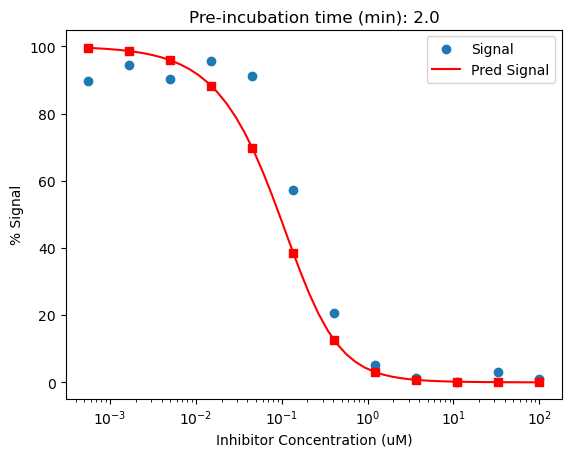

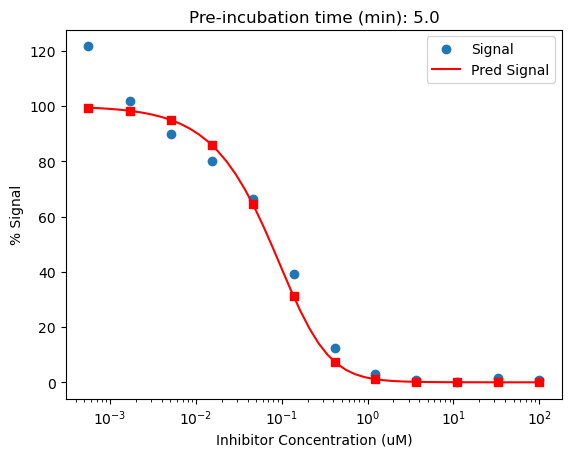

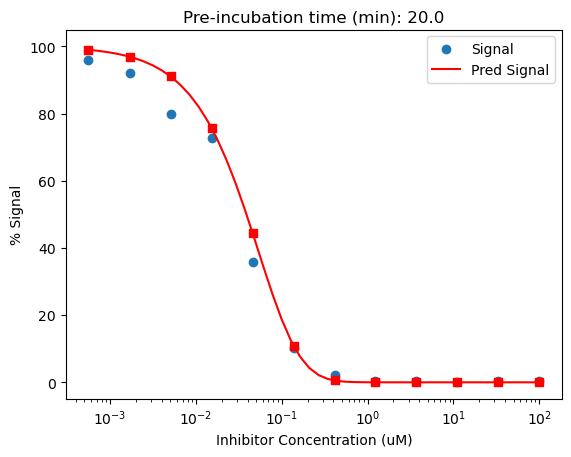

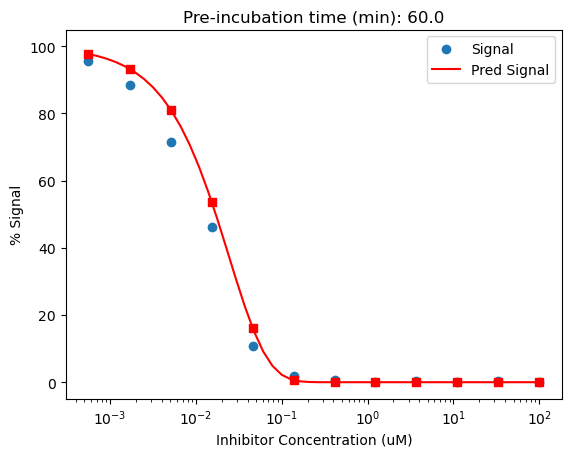

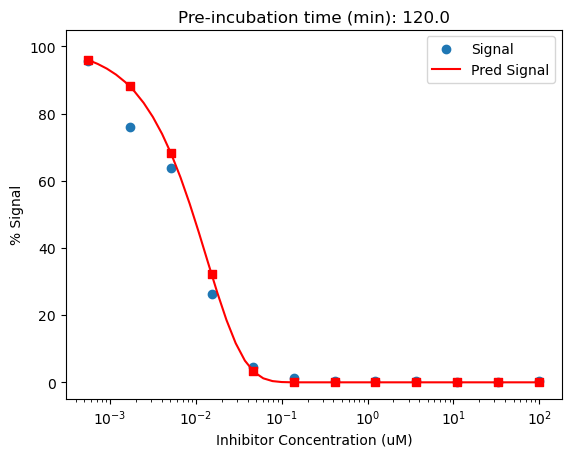

In [17]:
#plot the signal and predicted signal graphs 
for i in df.groupby('Pre-incubation time (min)'): 

    #to create a smooth line, predict the signal for an increased number of inhibitor concentrations
    inhibitor_concs = np.logspace(np.log10(np.min(i[1]['[Inhibitor] (µM)'][i[1]['[Inhibitor] (µM)'] != 0])), np.log10(max(i[1]['[Inhibitor] (µM)'])), 50) #generate inhibitor concentrations log spaced
    calc_pred_signal = [] 
    for s in inhibitor_concs:
        calc_pred_signal.append(kinact_KI_calculated.PreIncEndPoint([kinact_KI_calculated._kinact, kinact_KI_calculated._KI], i[1].iloc[0,0], i[1].iloc[0,1], s)* kinact_KI_calculated.response_coeff) #generate predicted signal using the calculated kinact and KI values for generated inhibitor concentrations 

    #plot the graph:
    plt.title('Pre-incubation time (min): ' + str(i[0]))
    plt.scatter(i[1]['[Inhibitor] (µM)'], i[1]['% Signal'], label='Signal') 
    plt.scatter(i[1]['[Inhibitor] (µM)'], i[1]['% Predicted signal'], c='r', marker='s')
    #plt.plot(i[1]['[Inhibitor] (µM)'], i[1]['Predicted signal'], label='Pred Signal', c='r', marker = 's') 
    plt.plot(inhibitor_concs, calc_pred_signal, label='Pred Signal', c='r')
    plt.xscale('log')
    plt.xlabel("Inhibitor Concentration (uM)")
    plt.ylabel("% Signal")
    plt.legend()
    plt.show()

In [9]:
#try random kinact and KI values and see if converges to same numbers
#create list of random starting kinact/KI values:
#Typically, kinact is 0.1 to 1.0 min-1
#Typically, KI is anywhere from 0.01 to 10 µM
starting_values = []
for i in range(250): #(creates 250 random kinact/KI values)
    x = [np.random.uniform(0.1, 1), np.random.uniform(0.01, 10)]
    starting_values.append(x)

In [10]:
#calculate kinact and KI for each set of random starting values
convergence_test = pd.DataFrame(columns = ['kinact starting value', 'KI starting value', 'calculated kinact', 'calculated KI'])
for i in starting_values:
    y = KineticParameterCalculator(array, 1.43, 0.0002, 11, 2.9, 8, 10, i[0], i[1])
    convergence_test.loc[len(convergence_test)] = [i[0], i[1], y._kinact, y._KI]
    #print("For initial values " + str(i) + " calculated kinact/Ki: " + str(y._kinact) + ", " +  str(y._KI))

convergence_test

kinact = 0.6245609211315045
KI = 1.0919496277102527
kinact = 0.6240446285175174
KI = 1.0910348940652004
kinact = 0.6245934248621121
KI = 1.0920071658938335
kinact = 0.6241721551069449
KI = 1.0912612634369725
kinact = 0.6247000079729098
KI = 1.092196476272469
kinact = 0.6245297303458415
KI = 1.0918943580002507
kinact = 0.6246401123940598
KI = 1.092090314878397
kinact = 0.6246007307248046
KI = 1.0920201285839057
kinact = 0.6245976479588617
KI = 1.092014668826126
kinact = 0.6242023845927269
KI = 1.0913144601725933
kinact = 0.6245506055425795
KI = 1.09193124176767
kinact = 0.6242114236015287
KI = 1.0913304705387215
kinact = 0.624569347548872
KI = 1.0919644122307615
kinact = 0.6241563558475973
KI = 1.091233293449516
kinact = 0.6245959658244886
KI = 1.0920116516228053
kinact = 0.6241694450110312
KI = 1.091256436201081
kinact = 0.6246601538539345
KI = 1.0921248382520763
kinact = 0.6245606210303338
KI = 1.0919494132557082
kinact = 0.6241821981981458
KI = 1.0912790364818112
kinact = 0.624653585

,kinact starting value,KI starting value,calculated kinact,calculated KI
0,0.515930,4.801841,0.624561,1.091950
1,0.784213,7.685032,0.624045,1.091035
2,0.300325,5.903378,0.624593,1.092007
3,0.838770,9.814173,0.624172,1.091261
4,0.850579,6.109460,0.624700,1.092196
...,...,...,...,...
245,0.152299,9.144505,0.624576,1.091977
246,0.369374,6.281705,0.624638,1.092087
247,0.947692,4.220071,0.624662,1.092129
248,0.408148,7.566236,0.624106,1.091144


In [11]:
#standard deviation of calculated kinact and KI, calculated from the different initial starting values of kinact and KI 
print(convergence_test['calculated kinact'].std())
print(convergence_test['calculated KI'].std())

0.00022958539037817483
0.0004065312539523431
